In [36]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv 

## Dense Neural Network

In [37]:
class DenseNeuralNet:   
    def __init__(self):
    #load in data set and assign testing/training variables    
        self.mnist = tf.keras.datasets.mnist
        self.model = None
        #x test/train in this case are data points
        #y test/train are the labels for the data
        self.x_train, y_train, x_test, y_test = None, None, None, None
    
    def loadData(self):
        #load and process dataset
        (self.x_train, self.y_train), (self.x_test, self.y_test) = self.mnist.load_data()

        #data normalization(axis=1 for column based operations) 
        self.x_train = tf.keras.utils.normalize(self.x_train, axis=1)
        self.x_test = tf.keras.utils.normalize(self.x_test, axis=1)

    def buildModel(self):
        #build the neural network
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)), #flattens to one dimensional array(size 784)
            tf.keras.layers.Dense(units=256, activation=tf.nn.relu), #784 -> 512 neurons
            tf.keras.layers.Dropout(0.4), #40% drop out for over fitting
            tf.keras.layers.Dense(units=128, activation=tf.nn.relu), #128 neurons
            #tf.keras.layers.Dropout(0.2), #20% dropout for over fitting
            tf.keras.layers.Dense(units=10, activation=tf.nn.softmax) #10 neurons for each digit(0-9)
        ])
    
    def compileModel(self):
        #compile the new model
        #sparse categorical crossentropy is used for integer classification, uses ints instead of one hot encoding
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def trainModel(self):
        #train the model
        self.model.fit(self.x_train, self.y_train, epochs=12, batch_size=32)

    def evaluateModel(self):
        #calculate the loss and accuracy of the model
        loss, accuracy = self.model.evaluate(self.x_test, self.y_test)
        print(f'Validation accuracy of model: {100*accuracy}')
        print(f'Loss of model: {loss}')

    def saveModel(self, filepath):
        #save model so dataset is not needed to run
        self.model.save(filepath)
        print(f'Model saved as: {filepath}')

    def loadModel(self, filepath):
        #call the model from the file
        self.model = tf.keras.models.load_model(filepath)

    def runModel(self):
        self.loadData()
        self.buildModel()
        self.compileModel()
        self.trainModel()
        self.evaluateModel()


In [38]:
class DigitPredictor:
    def __init__(self, model):
        self.model = model
    
    def imagePrediction(self):
        for i in range(1,18):
            img = cv.imread(f'images/handwritten_img{i}.png', cv.IMREAD_GRAYSCALE)
            
            #prompt for image loading error
            if img is None:
                print(f"Error loading image {i}, skipping...")
                continue 
            img = np.invert(np.array([img]))
            #model prediction
            prediction = self.model.predict(img)
            print(np.argmax(prediction))
            plt.imshow(img[0], cmap=plt.cm.binary)
            plt.show()


Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8502 - loss: 0.4985
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9546 - loss: 0.1475
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9643 - loss: 0.1140
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9680 - loss: 0.0974
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9737 - loss: 0.0816
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9762 - loss: 0.0730
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9790 - loss: 0.0655
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9795 - loss: 0.0620
Epoch 9/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9798 - loss: 0.0585
Epoch 10/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9827 - loss: 0.0509
Epoch 11/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9824 - loss: 0.0499
Epoch 12/12
1875/1875 ━━━━━━━━


Loss of model: 0.08759915828704834
Model saved as: dnn_mnist_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
3


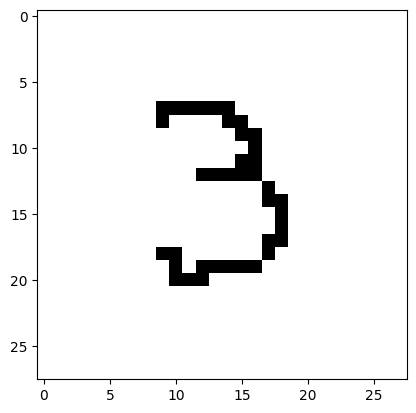

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1


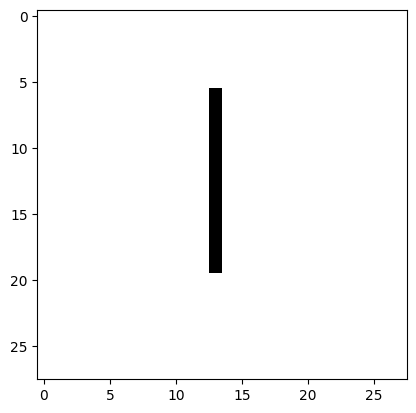

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2


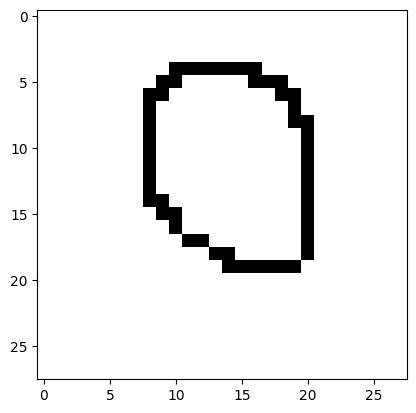

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
8


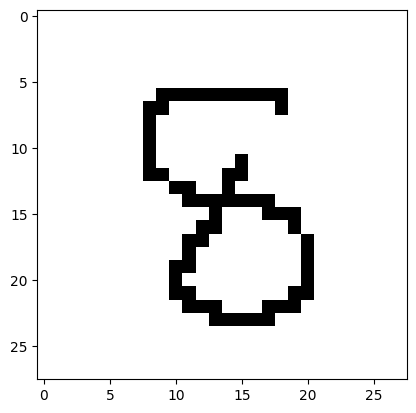

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7


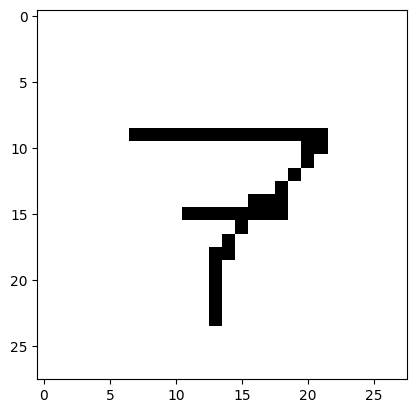

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2


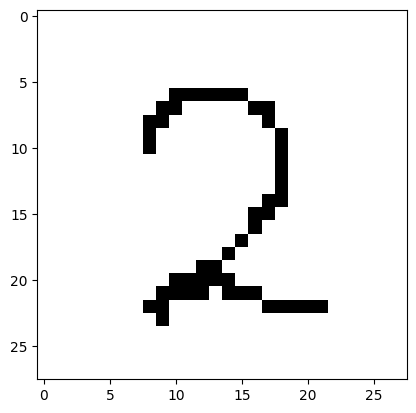

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1


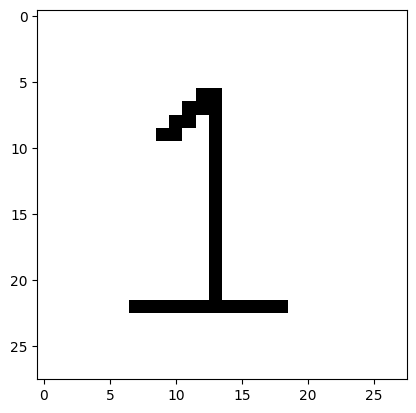

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3


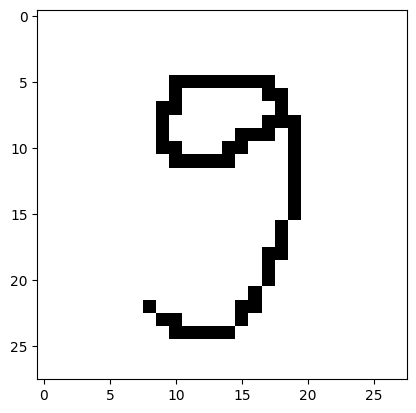

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
5


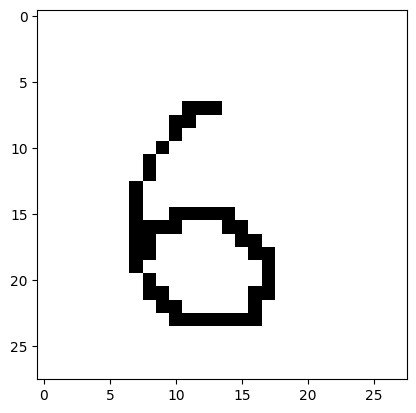

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
5


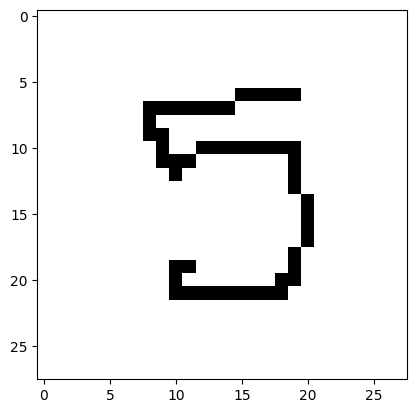

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2


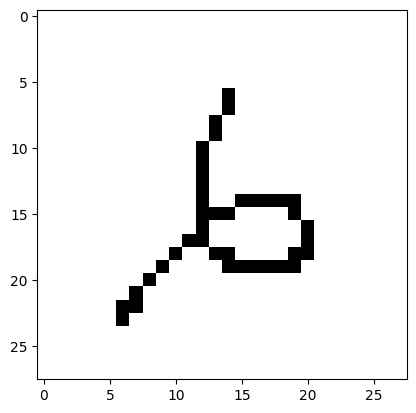

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4


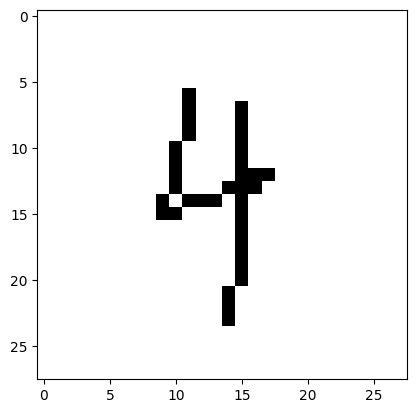

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7


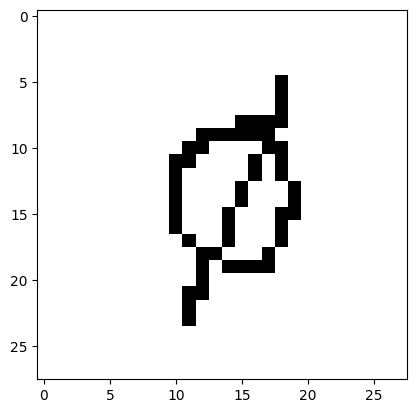

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
9


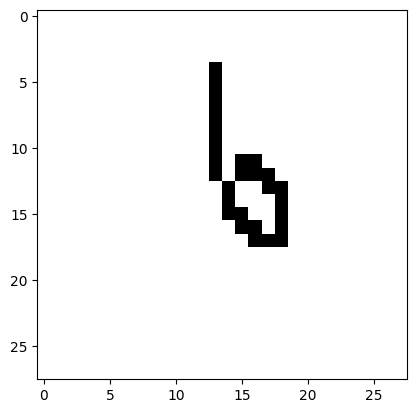

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4


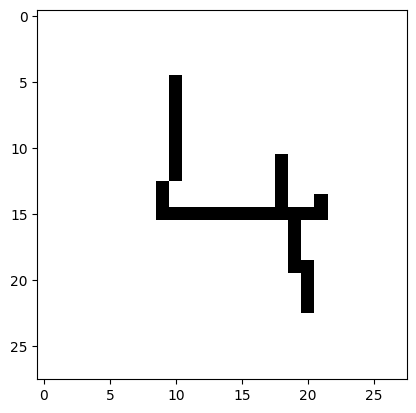

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7


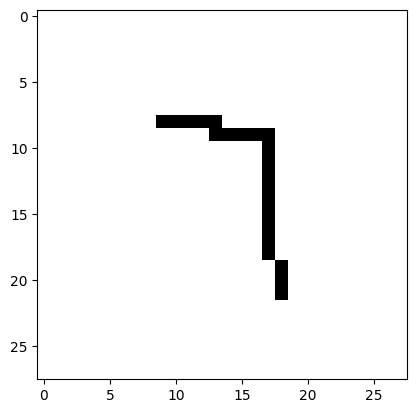

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2


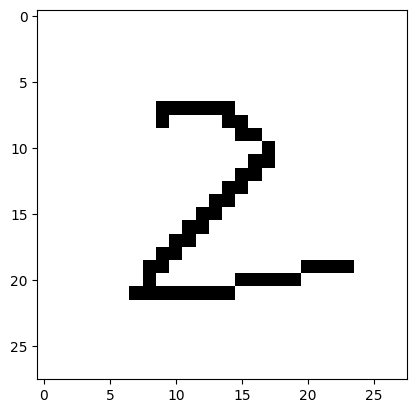

In [ ]:
if __name__ =="__main__":
    model = DenseNeuralNet()
    model.runModel()  #train the model and evaluate it
    model.saveModel('tf_dnn_mnist_model.h5')  #save the trained model

    #load the pre-trained model and use it for prediction
    predictor = DigitPredictor(model=model.model)  #use the trained model
    predictor.imagePrediction()  #make predictions on external images